In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


In [20]:
!!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

['--2023-09-25 20:32:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 1423529 (1.4M) [text/plain]',
 'Saving to: ‘housing.csv.2’',
 '',
 '     0K .......... .......... .......... .......... ..........  3% 46.2M 0s',
 '    50K .......... .......... .......... .......... ..........  7% 54.4M 0s',
 '   100K .......... .......... .......... .......... .......... 10% 61.6M 0s',
 '   150K .......... .......... .......... .......... .......... 14%  122M 0s',
 '   200K .......... .......... .......... .......... .......... 17%  214M 0s',
 '   250K .......... .......... .......... .......... .......... 21% 3.30M 0s',
 '   300K .......... .......... .......... .......... 


### EDA

* Load the data.



In [21]:
dataset = pd.read_csv('./housing.csv')


* Look at the `median_house_value` variable. Does it have a long tail? 


<Axes: xlabel='median_house_value', ylabel='Count'>

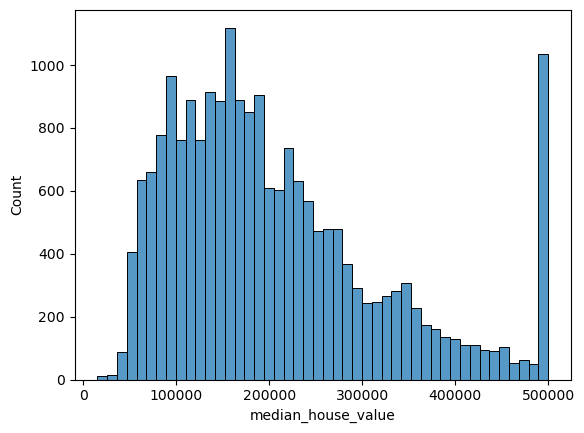

In [22]:
sns.histplot(dataset.median_house_value)




### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [23]:
dataset['ocean_proximity'] = dataset['ocean_proximity'].str.lower().str.replace(' ', '_')
dataset.ocean_proximity.unique()


array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [24]:
subset = dataset.query('ocean_proximity in ["<1h_ocean", "inland"]').drop('ocean_proximity', axis=1)
subset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0




### Question 1

There's one feature with missing values. What is it?

* `total_bedrooms`


In [25]:
subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64



### Question 2

What's the median (50% percentile) for variable `'population'`?

- 1195



In [26]:
subset['population'].median()

1195.0

In [27]:
subset['population'].quantile(0.5)

1195.0

<Axes: xlabel='population', ylabel='Count'>

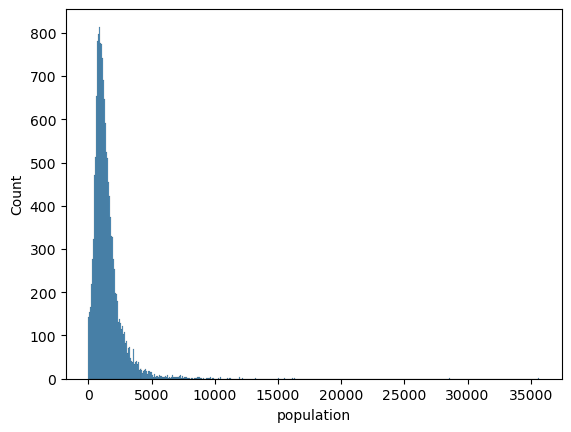

In [28]:
sns.histplot(subset['population'])



### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [29]:
n = len(subset)  #Total n of records

n_val = int(n * 0.2) #Validation data
n_test = int(n * 0.2) #Test dataset
n_train = n - n_val - n_test #Train dataset

print(f'{n} records.\nSize of validation dataset:\t{n_val}\nSize of test dataset:\t\t{n_test}\nSize of train dataset:\t\t{n_train}')

15687 records.
Size of validation dataset:	3137
Size of test dataset:		3137
Size of train dataset:		9413


In [30]:
#Sequence of number of size n to be shuffled
idx = np.arange(n)

#Set seed to make it reusable
np.random.seed(42)

#Shuffle the sequence
np.random.shuffle(idx)

In [31]:
df_train = subset.iloc[idx[:n_train]]
df_val =   subset.iloc[idx[n_train:n_train+n_val]]
df_test =  subset.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)


#Apply log transformation to 'median_house_value' values
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']



### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- Both are equally good


In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [33]:


X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

round(rmse(y_train, y_pred),2)


0.34

<Axes: ylabel='Count'>

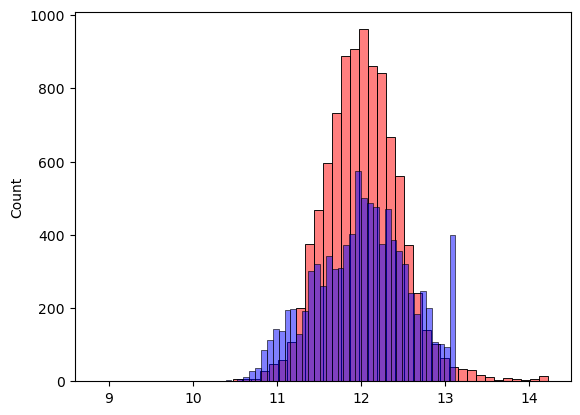

In [34]:

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [35]:

X_train = df_train.fillna(value=df_train['total_bedrooms'].mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

round(rmse(y_train, y_pred),2)


0.34

<Axes: ylabel='Count'>

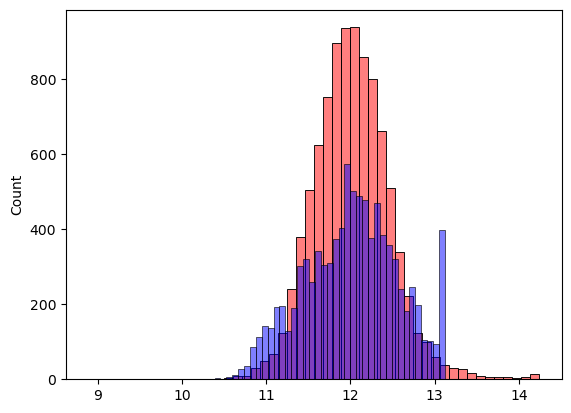

In [36]:

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)



### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001



In [37]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
X_train = df_train.fillna(0).values

rmse_vals = []
r_vals = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in r_vals:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_train.dot(w)
    rmse_vals.append(round(rmse(y_train, y_pred),2))

rmse_df = pd.DataFrame(data={'r':r_vals, 'rmse':rmse_vals})    

rmse_df.sort_values(by='rmse')


,r,rmse
0,0.000000,0.34
1,0.000001,0.34
2,0.000100,0.34
3,0.001000,0.34
4,0.010000,0.34
5,0.100000,0.34
6,1.000000,0.34
7,5.000000,0.35
8,10.000000,0.35



### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?


- 0.005


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.



In [60]:
def set_partitions(seed, subset):
    n = len(subset)  #Total n of records

    n_val = int(n * 0.2) #Validation data
    n_test = int(n * 0.2) #Test dataset
    n_train = n - n_val - n_test #Train dataset

    # print(f'{n} records.\nSize of validation dataset:\t{n_val}\nSize of test dataset:\t\t{n_test}\nSize of train dataset:\t\t{n_train}')

    #Sequence of number of size n to be shuffled
    idx = np.arange(n)

    #Set seed to make it reusable
    np.random.seed(seed)

    #Shuffle the sequence
    np.random.shuffle(idx)

    df_train = subset.iloc[idx[:n_train]]
    df_val =   subset.iloc[idx[n_train:n_train+n_val]]
    df_test =  subset.iloc[idx[n_train+n_val:]]

    # df_train = df_train.reset_index(drop=True)
    # df_val   = df_val.reset_index(drop=True)
    # df_test  = df_test.reset_index(drop=True)


    #Apply log transformation to 'median_house_value' values
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)


    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, df_val, df_test, y_train, y_val, y_test

rmse_vals = []

for seed_val in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:


    df_tr, df_v, df_t , y_tr, y_v, y_t = set_partitions(seed_val, subset)

    X_v = df_v.fillna(0).values

    w0, w = train_linear_regression(X_v, y_v)

    y_pred = w0 + X_v.dot(w)

    rmse_val = rmse(y_v, y_pred)

    rmse_vals.append(rmse_val)

    print(seed_val, rmse_val)




0 0.33680456098353484
1 0.3373148419545583
2 0.33746183292621046
3 0.33115926177457083
4 0.33703177870922923
5 0.34181299938841203
6 0.3340361485590694
7 0.3437039993036531
8 0.34973490486442993
9 0.33356913402114174


In [61]:
np.std(rmse_vals).round(3)

0.005


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:


- 0.33




In [62]:
seed_val = 9


df_tr, df_v, df_t , y_tr, y_v, y_t = set_partitions(seed_val, subset)

df_tr_v = pd.concat([df_tr, df_v])
y_tr_v = np.concatenate((y_tr, y_v))

X_tr_v = df_tr_v.fillna(0).values

w0, w = train_linear_regression_reg(X_tr_v, y_tr_v, r=0.001)

y_pred = w0 + X_tr_v.dot(w)

rmse_val = rmse(y_tr_v, y_pred)


print(seed_val, rmse_val.round(2))

9 0.34



## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.
